In [40]:
# import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [62]:
# Memuat data dengan format csv

dataset = pd.read_csv('Mall_Customers.csv')

# Menampilkan 10 baris teratas dari dataset
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [42]:
# Cek Dimensi Data
dataset.shape

(200, 5)

In [43]:
# Cek Tipe Data
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [44]:
# Statistik Dasar
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [55]:
# Filter outlier pada dataset
outlier_filter = (dataset.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (dataset.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,True,False


In [56]:
import warnings

In [57]:
warnings.filterwarnings("ignore")

In [59]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :
    if dataset[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')

Nama Kolom: CustomerID
CustomerID
False    200
Name: count, dtype: int64
-------------------
Nama Kolom: Age
Age
False    200
Name: count, dtype: int64
-------------------
Nama Kolom: Annual Income (k$)
Annual Income (k$)
False    198
True       2
Name: count, dtype: int64
-------------------
Nama Kolom: Spending Score (1-100)
Spending Score (1-100)
False    200
Name: count, dtype: int64
-------------------


In [45]:
q1 = dataset.select_dtypes(exclude="object").quantile(0.25)
q3 = dataset.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [46]:
batas_atas = q3 + 1.5 * iqr
batas_atas

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [48]:
# Cek Missing Values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
# Missing values (Menghasilkan DataFrame dengan nilai boolean, di mana setiap elemen adalah True jika nilai pada posisi tersebut adalah null (kosong), dan False jika ada nilai)
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
# Fitur Selection
X= dataset.iloc[:, [3,4]].values

In [51]:
# Model K-means
from sklearn.cluster import KMeans
wcss=[]

# Diasumsikan bahwa jumlah maksimal cluster yang mungkin dalam dataset adalah 10. Ini adalah asumsi awal. 
# Metode yang bisa digunakan untuk menilai atau menghitung rata-rata dari hasil clustering yang berbeda.

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

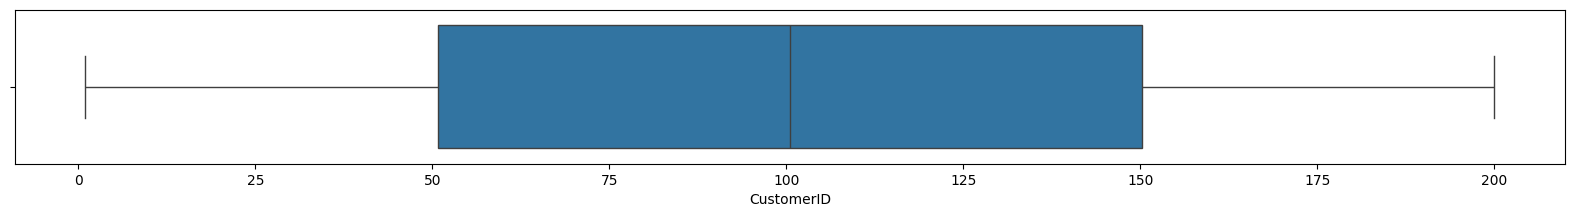

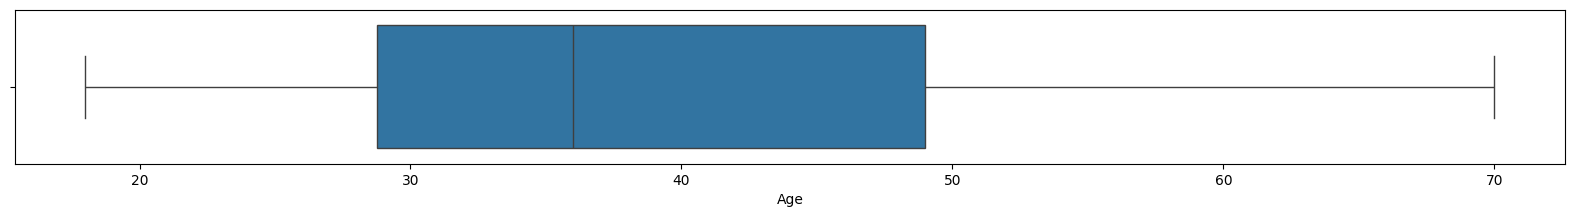

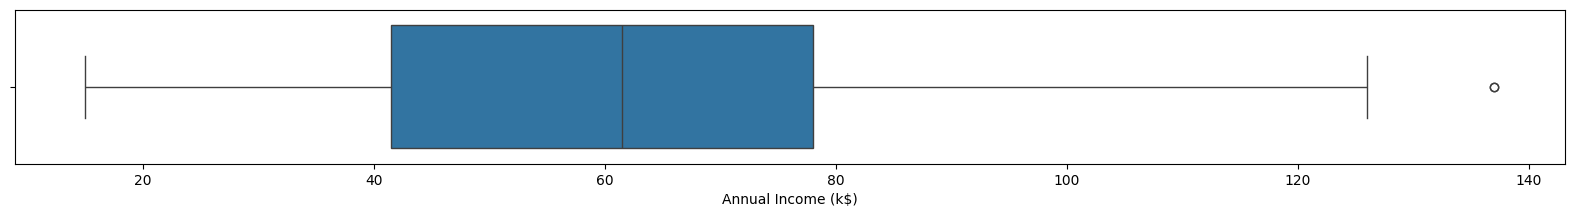

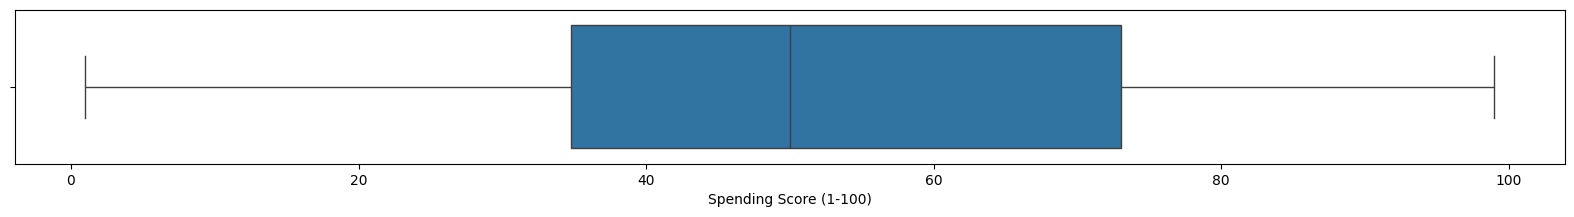

In [61]:
# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Mencari Outliers - Boxplot
dataset_outlier = dataset.select_dtypes(exclude=['object'])
for column in dataset_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=dataset_outlier, x=column)

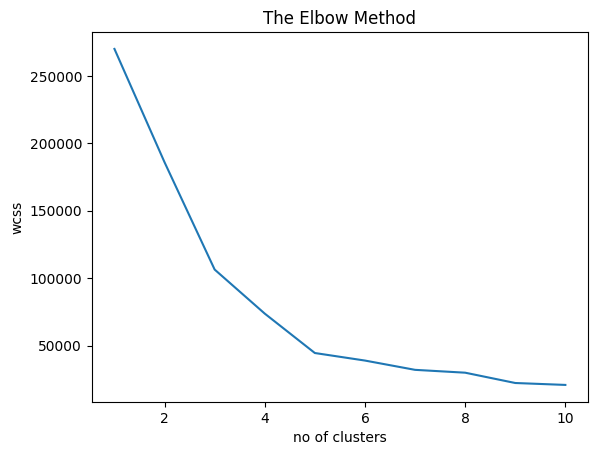

In [52]:
# Visualisasi ELBOW
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
# Pada plot ini, akan ada titik di mana kurva mulai menurun dengan lebih lambat, 
# membentuk sudut (mirip seperti siku atau "elbow"). Sudut terakhir dari kurva ini muncul ketika k=5, 
# yang menunjukkan bahwa 5 adalah jumlah optimal cluster.

# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

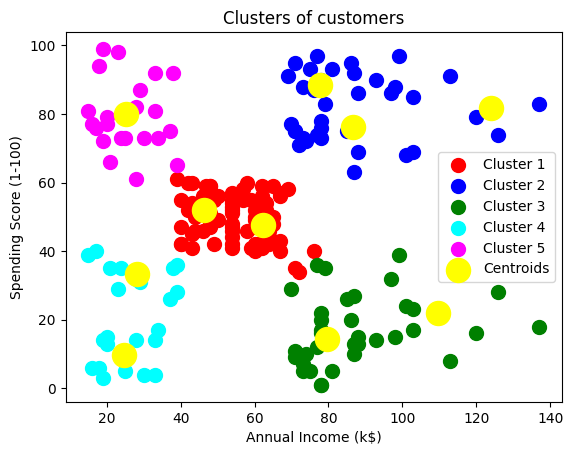

In [54]:
# Visualiasi semua clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()